In [61]:
# !pip install scikit-learn

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [ ]:
# This data project is pivotal for advancing precision agriculture practices, particularly in the context of Indian farming.
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Data Description
#### The dataset is a comprehensive collection of data points relevant to Indian agriculture, focusing on:

N (Nitrogen): Nitrogen content in the soil.

P (Phosphorus): Phosphorus levels.

K (Potassium): Potassium amount.

Temperature: Measured in degrees Celsius.

Humidity: Percentage of relative humidity.

pH: Indicates soil acidity or alkalinity.

Rainfall: Rainfall amount in millimeters.

# Assignment
The objective of this project is to provide actionable insights into optimal crop selection by analyzing environmental and soil factors. This will involve an exploration of how various crops respond to specific conditions, such as soil nutrient content, climatic factors like temperature and humidity, and rainfall patterns.

In [20]:
df.shape

(2200, 8)

In [ ]:
df.info(); # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


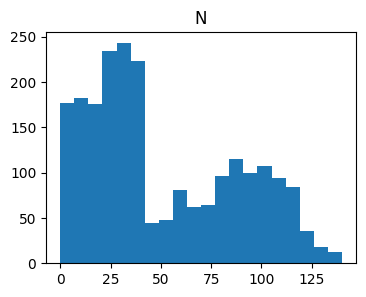

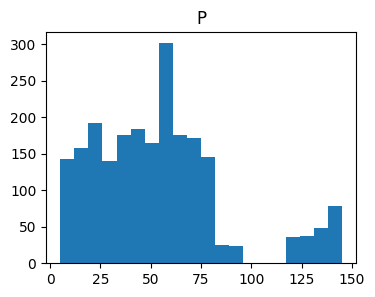

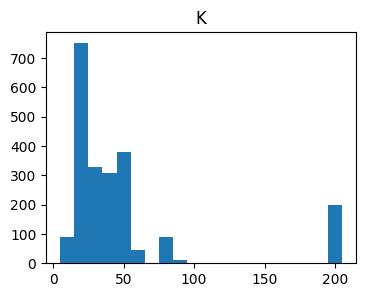

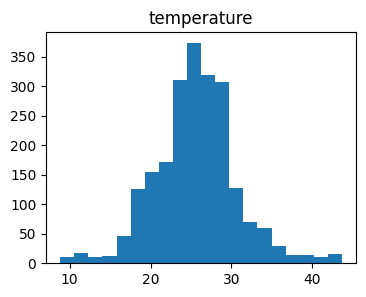

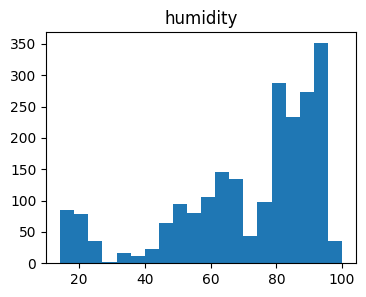

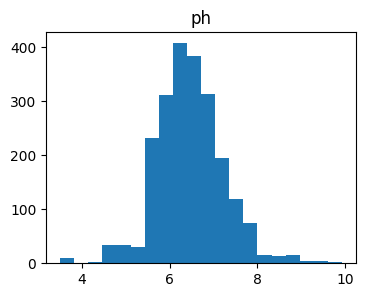

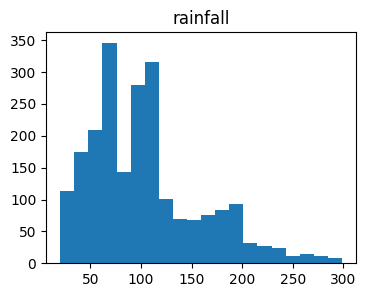

In [16]:
# Plotting histograms to understand the distribution
for col in df.columns[:-1]: # Excluding the label which is categorical
    df.hist(col, figsize=(4,3), bins=20, grid=False);

# VISUALISATION TASKS


## Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.

In [19]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [21]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

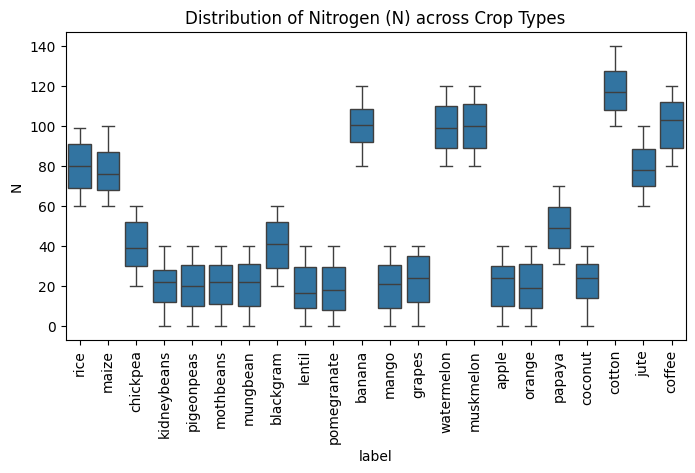

In [35]:
# Plot the distributions of each soil nutrient (N, P, K) and compare them across different crop types to identify any patterns.
# Nitrogen
figsize = (8,4)
plt.figure(figsize=figsize)
sns.boxplot(x='label', y='N', data=df)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title('Distribution of Nitrogen (N) across Crop Types')
plt.show()


The image is a box plot showing the distribution of Nitrogen (N) content across various crop types. Here are some key conclusions we can draw from this visualization:

1. **High Nitrogen Content**: Crops like rice, maize, and coffee show higher median Nitrogen content compared to other crops. This suggests that these crops may thrive better in soils with higher Nitrogen levels.

2. **Low Nitrogen Content**: Crops such as chickpea, kidneybeans, pigeonpeas, mothbeans, mungbean, blackgram, and lentil have lower median Nitrogen content. These crops might be more suited to soils with lower Nitrogen levels.

3. **Variability**: There is noticeable variability in Nitrogen content within certain crops. For example, rice and maize have a wider interquartile range, indicating more variability in Nitrogen content. This could imply that these crops are more adaptable to a range of Nitrogen levels.

4. **Outliers**: Some crops show outliers, indicating that there are some data points with unusually high or low Nitrogen content compared to the rest of the data for that crop. This could be due to specific conditions or anomalies in the data.

### Importance of These Insights:
- **Crop Selection**: Understanding the Nitrogen content requirements for different crops can help in making informed decisions about which crops to plant in a given soil.
- **Soil Management**: Farmers can optimize their use of fertilizers by knowing which crops need more or less Nitrogen, thereby improving yield and reducing costs.

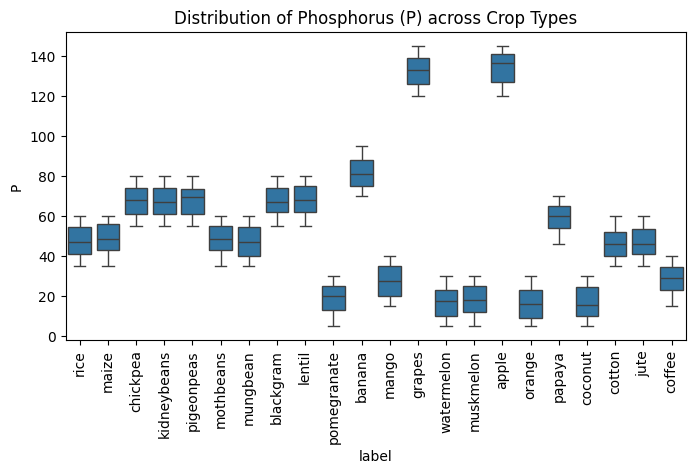

In [30]:
# Phosphorus
plt.figure(figsize=figsize)
sns.boxplot(x='label', y='P', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Phosphorus (P) across Crop Types')
plt.show()

### Key Insights:
1. **High Phosphorus Content**: Crops like banana, coffee, and orange show higher median Phosphorus levels, suggesting they may require or thrive in soils with higher Phosphorus content.
2. **Low Phosphorus Content**: Crops such as lentil, mothbeans, and mungbean have lower median Phosphorus levels, indicating they might be more suited to soils with lower Phosphorus content.
3. **Variability**: There is noticeable variability in Phosphorus content within certain crops, such as watermelon and apple, suggesting they are adaptable to a range of Phosphorus levels.
4. **Outliers**: Some crops show outliers, indicating the presence of data points with unusually high or low Phosphorus levels compared to the rest of the data for that crop.

### Importance:
- **Soil Management**: Helps in optimizing the use of Phosphorus fertilizers.
- **Crop Selection**: Assists in choosing the right crops based on soil Phosphorus levels.

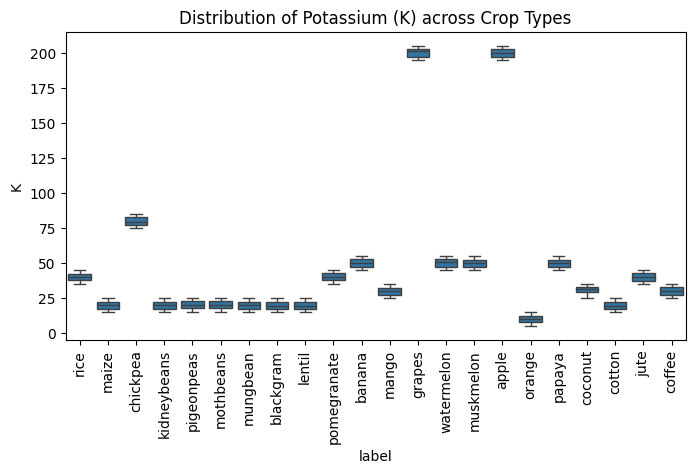

In [31]:
# Potassium
plt.figure(figsize=figsize)
sns.boxplot(x='label', y='K', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Potassium (K) across Crop Types')
plt.show()

## Generate scatter plots to visualize the relationship between temperature, humidity, pH, and rainfall with crop type to detect dependencies.

In [36]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


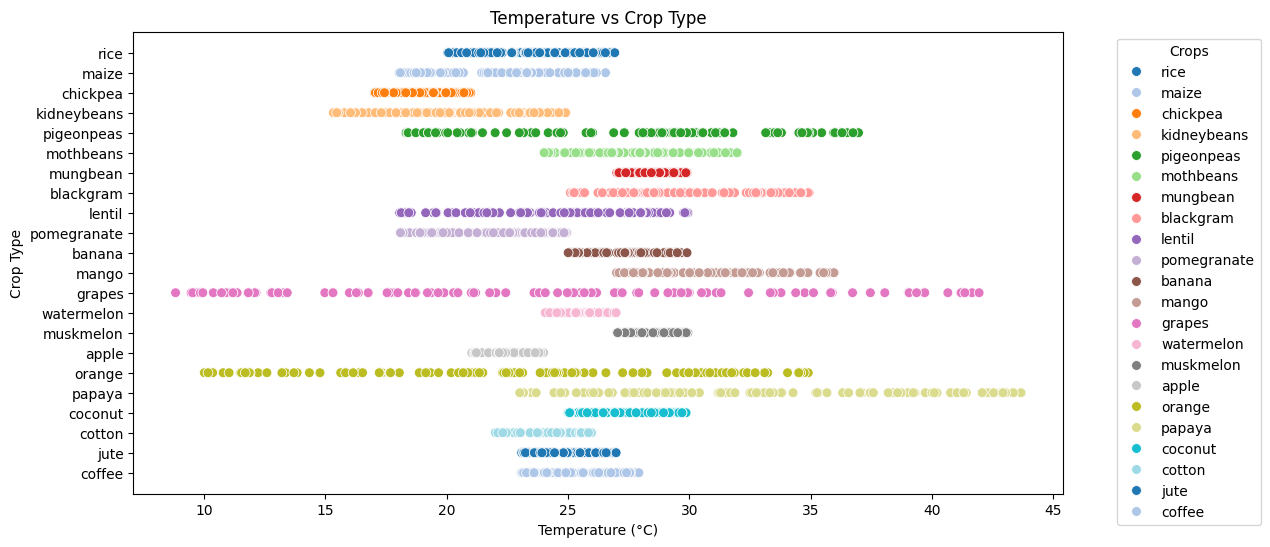

In [38]:
# Scatter Plot: Temperature vs. Crop Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temperature', y='label', hue='label', data=df, palette='tab20', s=50)
plt.title('Temperature vs Crop Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Crops')
plt.show()

The scatter plot you provided visualizes the relationship between temperature and different crop types. Here are some key conclusions we can draw:

### Key Insights:
1. **Temperature Ranges for Crops**: Each crop type has a specific range of temperatures at which it is grown. For example, rice is grown in temperatures ranging from approximately 20°C to 35°C, while maize has a similar but slightly broader range.
2. **Optimal Temperature Zones**: Some crops have a narrower optimal temperature range, such as mungbean, which is grown between 25°C and 35°C, while others like watermelon and muskmelon have a broader range, from 15°C to 35°C.
3. **Temperature Overlaps**: There are overlaps in the temperature ranges for different crops, indicating that multiple crops can be grown in similar temperature conditions. For instance, maize, chickpea, and kidneybeans share overlapping temperature ranges.
4. **Temperature Extremes**: Certain crops are grown at temperature extremes. For example, coffee is grown at lower temperatures (around 15°C to 25°C), while cotton is grown at higher temperatures (up to 45°C).

### Importance:
- **Crop Selection**: Helps in selecting appropriate crops for cultivation based on the temperature conditions of a region.
- **Agricultural Planning**: Aids in planning crop rotation and intercropping strategies based on temperature compatibility.

This visualization effectively highlights the temperature preferences of various crops, which is crucial for optimizing crop selection and improving agricultural yield.

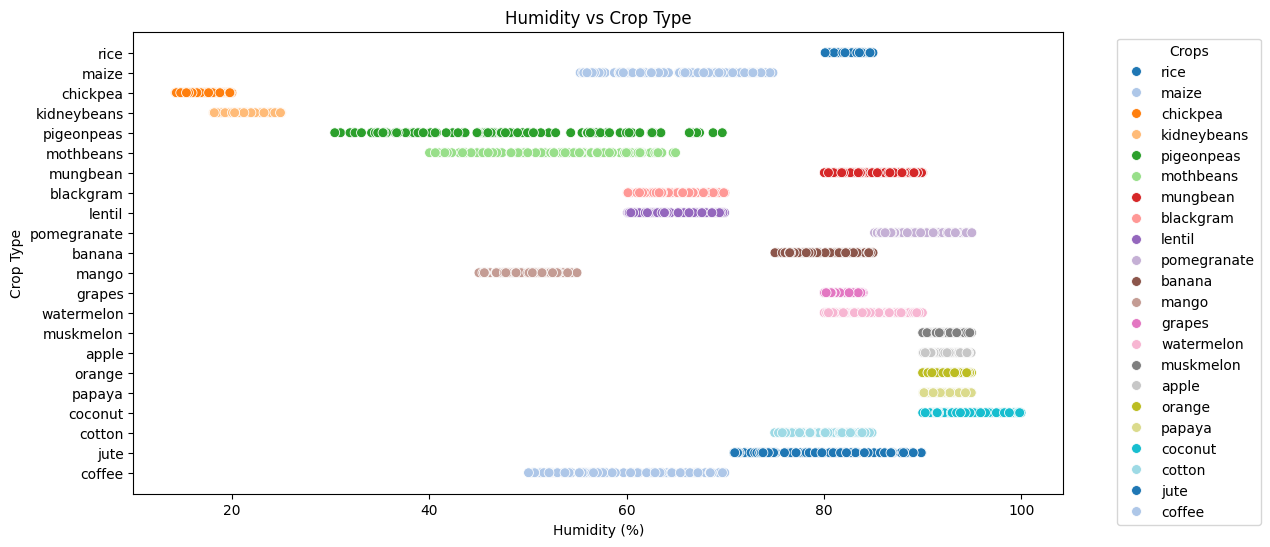

In [39]:
# Scatter Plot: Humidity vs. Crop Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='humidity', y='label', hue='label', data=df, palette='tab20', s=50)
plt.title('Humidity vs Crop Type')
plt.xlabel('Humidity (%)')
plt.ylabel('Crop Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Crops')
plt.show()

The scatter plot you provided shows the relationship between humidity and various crop types. Here's a concise analysis of the visualization:

### Key Insights:
1. **Humidity Preferences**:
   - **High Humidity**: Crops like rice, banana, and coconut are grown in high humidity environments (70% to 90%).
   - **Medium Humidity**: Crops such as maize, pomegranate, and watermelon thrive in medium humidity levels (40% to 70%).
   - **Low Humidity**: Crops like lentil, chickpea, and mothbeans prefer lower humidity levels (20% to 50%).

2. **Humidity Overlaps**:
   - Some crops can be grown in a wide range of humidity levels. For example, maize and cotton show adaptability to both medium and slightly high humidity levels.

3. **Narrow Humidity Range**:
   - Crops like banana and coconut have a narrower humidity range, indicating specific humidity requirements for optimal growth.

4. **Humidity Tolerance**:
   - Crops such as watermelon and mungbean show tolerance to a broader range of humidity levels, making them more versatile under varying humidity conditions.

### Importance:
- **Crop Selection**: Helps in selecting crops based on the humidity conditions of a region, optimizing growth and yield.
- **Agricultural Planning**: Assists in planning crop cultivation strategies, such as crop rotation and intercropping, based on humidity compatibility.

This analysis highlights the humidity preferences of various crops, providing valuable insights for optimizing agricultural practices.

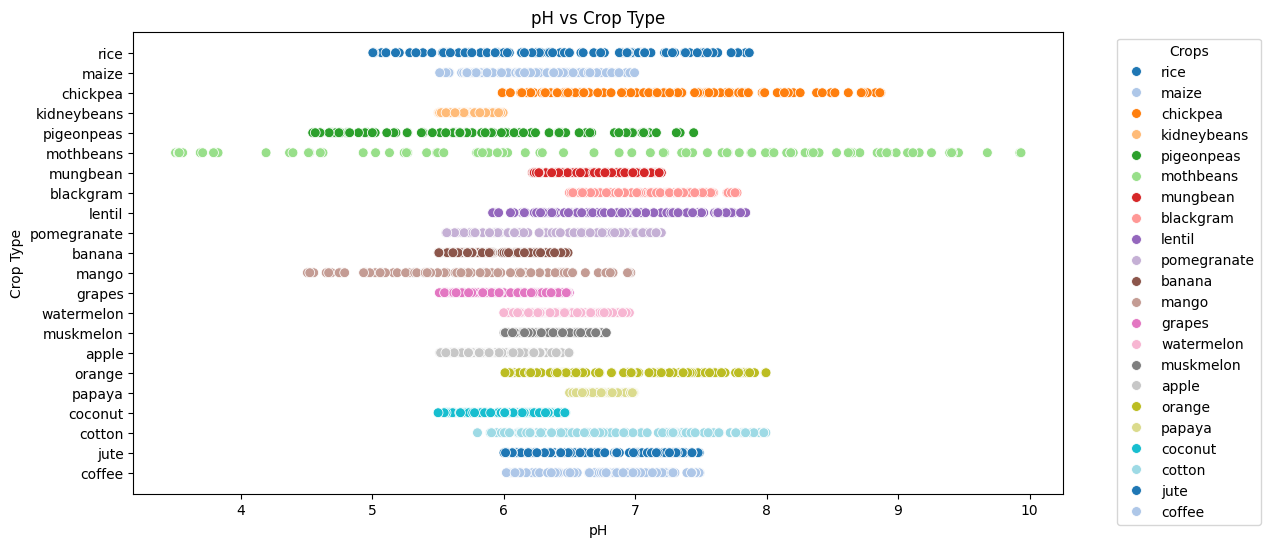

In [40]:
# Scatter Plot: pH vs. Crop Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ph', y='label', hue='label', data=df, palette='tab20', s=50)
plt.title('pH vs Crop Type')
plt.xlabel('pH')
plt.ylabel('Crop Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Crops')
plt.show()

The scatter plot you provided visualizes the relationship between pH levels and different crop types. Here's a concise analysis:

### Key Insights:
1. **Optimal pH Range**:
   - **Neutral to Slightly Acidic**: Crops like rice, maize, and blackgram thrive in pH levels between 5.5 and 7.5. This suggests they prefer neutral to slightly acidic soils.
   - **Acidic**: Crops such as coffee, watermelon, and muskmelon can grow in more acidic conditions, with pH levels ranging from 4.5 to 6.5.
   - **Alkaline**: Certain crops like pigeonpeas and mothbeans can tolerate more alkaline soils, with pH levels up to 8.0.

2. **pH Tolerance**:
   - Some crops, like rice and maize, show a wider range of pH tolerance, indicating their adaptability to varying soil conditions.
   - Crops with a narrow pH range, such as coffee and lentil, have specific soil acidity requirements for optimal growth.

3. **Outliers**:
   - There are a few outliers for certain crops, indicating that while these crops generally prefer a specific pH range, they can occasionally grow in slightly different conditions.

### Importance:
- **Soil Management**: Helps in adjusting soil pH levels through liming or other treatments to suit specific crops.
- **Crop Selection**: Assists in selecting crops based on the inherent pH levels of the soil in different regions.

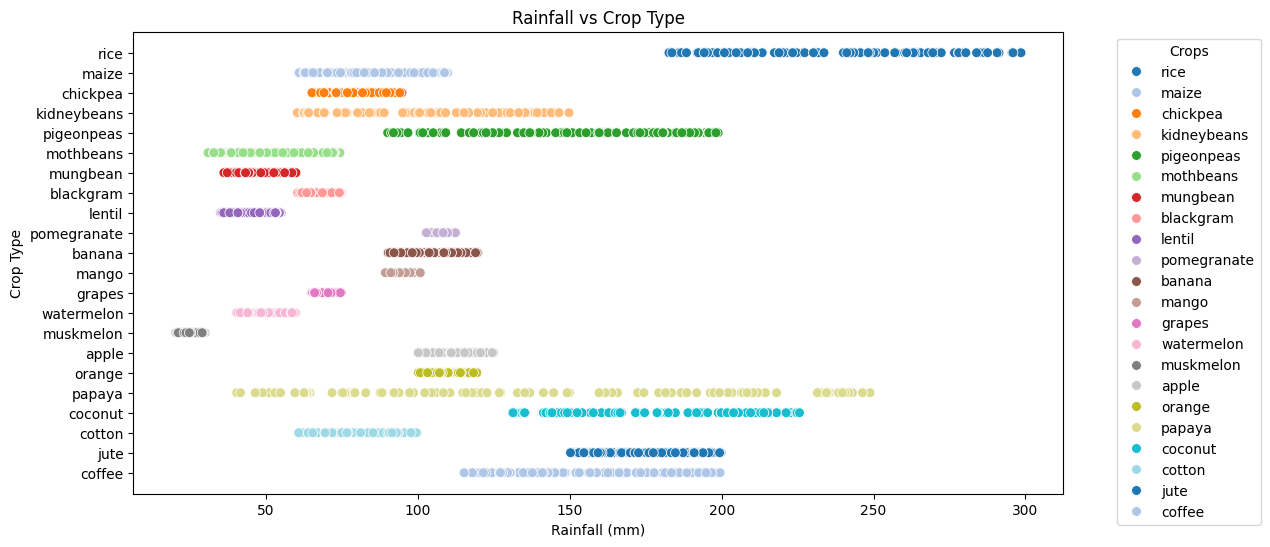

In [41]:
# Scatter Plot: Rainfall vs. Crop Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='rainfall', y='label', hue='label', data=df, palette='tab20', s=50)
plt.title('Rainfall vs Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Crops')
plt.show()

The scatter plot you provided shows the relationship between rainfall and various crop types. Here’s a concise analysis of the visualization:

### Key Insights:
1. **Rainfall Preferences**:
   - **High Rainfall**: Crops like rice, jute, and banana are associated with higher rainfall levels (150 mm to 300 mm), indicating they require or thrive in regions with substantial rainfall.
   - **Medium Rainfall**: Crops such as maize, pomegranate, and watermelon grow well in moderate rainfall conditions (75 mm to 150 mm).
   - **Low Rainfall**: Crops like chickpea, lentil, and mothbeans are suited to lower rainfall levels (0 mm to 75 mm), making them more drought-tolerant.

2. **Rainfall Overlaps**:
   - Some crops, like maize and watermelon, show adaptability to both medium and higher rainfall levels, indicating versatility in water requirements.

3. **Specific Requirements**:
   - Crops like coconut and coffee show narrower rainfall ranges, suggesting specific water needs for optimal growth.

### Importance:
- **Crop Selection**: Helps in choosing crops based on the expected rainfall in a region, optimizing water usage and crop yield.
- **Agricultural Planning**: Assists in planning irrigation and water management strategies based on crop water requirements.

## Craft heatmaps to show correlations between all numerical factors, helping to pinpoint interdependencies.

<Axes: >

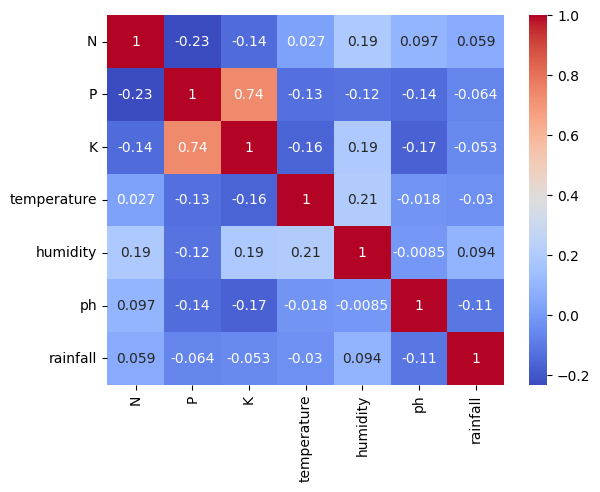

In [43]:
sns.heatmap(df[df.columns[:-1]].corr(), annot=True, cmap='coolwarm')

### Key Insights:

1. **Strong Positive Correlations**:
   - **Phosphorus (P) and Potassium (K)**: There is a strong positive correlation (0.74) between P and K, indicating that soils with high Phosphorus levels tend to also have high Potassium levels.

2. **Moderate Positive Correlations**:
   - **Humidity and Temperature**: Shows a moderate positive correlation (0.21), suggesting that higher humidity levels are somewhat associated with higher temperatures.
   - **Humidity and Nitrogen (N)**: Also has a moderate positive correlation (0.19), indicating that soils with higher Nitrogen content tend to be associated with higher humidity levels.
   - **Humidity and Potassium (K)**: Displays a similar moderate positive correlation (0.19).

3. **Weak Positive Correlations**:
   - **pH and Nitrogen (N)**: Exhibits a weak positive correlation (0.097), indicating a slight tendency for soils with higher Nitrogen content to be less acidic.
   - **Rainfall and Humidity**: Shows a weak positive correlation (0.094), meaning regions with higher rainfall tend to have higher humidity levels.

4. **Weak Negative Correlations**:
   - **Phosphorus (P) and Nitrogen (N)**: Displays a weak negative correlation (-0.23), suggesting that soils with higher Phosphorus content might have slightly lower Nitrogen levels.
   - **Potassium (K) and Nitrogen (N)**: Has a weak negative correlation (-0.14).
   - **Temperature and Phosphorus (P)**: Shows a weak negative correlation (-0.13).
   - **Temperature and Potassium (K)**: Shows a weak negative correlation (-0.16).
   - **pH and Phosphorus (P)**: Exhibits a weak negative correlation (-0.14).
   - **pH and Potassium (K)**: Shows a weak negative correlation (-0.17).
   - **Rainfall and Phosphorus (P)**: Displays a weak negative correlation (-0.064).
   - **Rainfall and Potassium (K)**: Shows a weak negative correlation (-0.053).
   - **Rainfall and pH**: Has a weak negative correlation (-0.11).

5. **Very Weak or No Correlations**:
   - **Temperature and Nitrogen (N)**: Exhibits a very weak positive correlation (0.027).
   - **Temperature and pH**: Shows a very weak negative correlation (-0.018).
   - **Temperature and Rainfall**: Has a very weak negative correlation (-0.03).
   - **Humidity and Phosphorus (P)**: Displays a very weak negative correlation (-0.12).
   - **Humidity and pH**: Has a very weak negative correlation (-0.0085).
   - **Rainfall and Temperature**: Exhibits a very weak negative correlation (-0.03).

### Conclusion:
- **Soil Nutrients**: Strong and moderate correlations between soil nutrients (N, P, K) and environmental factors (temperature, humidity, rainfall) can guide fertilizer use and crop selection.
- **Environmental Factors**: Understanding these correlations helps optimize agricultural practices, ensuring crops are grown under the best possible conditions.

# Perform Statistical Analysis:

## Execute ANOVA tests to examine whether means of different environmental factors (like humidity, temperature, and rainfall) are significantly different across various crop types.

### What is ANOVA?
**ANOVA (Analysis of Variance)** is a statistical test used to check whether the averages (means) of three or more groups are significantly different from each other.

---

### Real-Life Analogy:
Imagine you’re a farmer with three fields, and you want to know if the average height of crops differs between the fields. Instead of comparing them two at a time, ANOVA checks **all fields at once** to see if there’s a significant difference in average crop height.

---

### How Does It Work?
1. **Groups**: In your case, each crop type (e.g., rice, maize, apple) is a group.
2. **Comparison**: ANOVA looks at:
   - Differences **within each group** (how spread out the data is for one crop type).
   - Differences **between groups** (how much the group averages differ).
3. **Result**: It calculates an **F-statistic** and a **p-value**:
   - **F-statistic**: Shows the ratio of differences between groups to differences within groups.
   - **p-value**: Tells if the differences are statistically significant (e.g., due to real patterns, not random chance).

---

### Key Point:
- ANOVA doesn't tell you which specific groups are different—it only tells if **at least one group** has a significantly different mean. For that, you'd do a **post-hoc test** (like Tukey's test).

---

### Example for Your Dataset:
If you run ANOVA on **temperature**:
- Groups = Different crops (e.g., rice, maize, apple).
- Test = Checks if the **average temperature requirement** differs significantly between crops.
- **Result**:
  - If p-value < 0.05, temperature requirements **are significantly different** for at least one crop type.

### How is the p-value calculated in ANOVA?
The **p-value** in an ANOVA test is calculated based on the **F-statistic**, which measures how much variation exists between the group means compared to within the groups. The steps are as follows:

---

### 1. **Calculate the F-statistic**
The F-statistic is computed using two variances:
1. **Between-group variance** (differences between the means of the groups).
2. **Within-group variance** (how much individual data points vary within each group).

The formula for F-statistic is:

$$ F = \frac{\text{Variance Between Groups}}{\text{Variance Within Groups}} $$

- A higher F-statistic suggests larger differences between the groups relative to the differences within the groups.

---

### 2. **Find the p-value from the F-distribution**
The **p-value** is derived using:
1. The calculated F-statistic.
2. The degrees of freedom (df):
   - **df1**: The number of groups minus 1.
   - **df2**: Total number of data points minus the number of groups.

The p-value tells us the probability of observing such an F-statistic (or a more extreme one) if the null hypothesis is true. The null hypothesis in ANOVA states:

> All groups have the same mean (no significant differences).

- **Small p-value (< 0.05)**: Reject the null hypothesis → At least one group mean is significantly different.
- **Large p-value (≥ 0.05)**: Fail to reject the null hypothesis → Group means are not significantly different.

---

### 3. **How Python Does This**
When you use a function like `f_oneway()` from `scipy.stats`, Python automatically:
- Computes the F-statistic using the formula.
- Looks up the corresponding p-value using the F-distribution table.
  
You don’t need to calculate it manually, but it’s good to understand the process behind the scenes!

---

### Example:
Let’s say you’re comparing **temperature** across 3 crops (e.g., rice, maize, apple):
- Groups: [23, 25, 24] (rice), [27, 28, 26] (maize), [18, 19, 20] (apple).
- F-statistic = 15.6 (calculated using the formula).
- Python computes a **p-value** based on this F-statistic and the degrees of freedom.

If the **p-value = 0.002**, it’s less than 0.05, so you conclude there’s a significant difference in temperature requirements for at least one crop type.

In [52]:
# Steps to Perform ANOVA:
# Group the data by label (crop type).
# Extract values for each environmental factor grouped by crop type.

# Grouping data by crop type
groups_humidity = [df[df['label'] == crop]['humidity'].values for crop in df['label'].unique()] #shape = 22 x 100 meaning 22 crops and 100 samples
groups_temperature = [df[df['label'] == crop]['temperature'].values for crop in df['label'].unique()]
groups_rainfall = [df[df['label'] == crop]['rainfall'].values for crop in df['label'].unique()]
groups_ph = [df[df['label'] == crop]['ph'].values for crop in df['label'].unique()]
groups_N = [df[df['label'] == crop]['N'].values for crop in df['label'].unique()]
groups_P = [df[df['label'] == crop]['P'].values for crop in df['label'].unique()]
groups_K = [df[df['label'] == crop]['K'].values for crop in df['label'].unique()]

In [53]:
# Perform ANOVA
anova_humidity = f_oneway(*groups_humidity)
anova_temperature = f_oneway(*groups_temperature)
anova_rainfall = f_oneway(*groups_rainfall)
anova_ph = f_oneway(*groups_ph)
anova_N = f_oneway(*groups_N)
anova_P = f_oneway(*groups_P)
anova_K = f_oneway(*groups_K)

In [54]:
# Display results
print("ANOVA Results:")
print(f"Humidity: F-statistic = {anova_humidity.statistic:.4f}, p-value = {anova_humidity.pvalue:.4e}")
print(f"Temperature: F-statistic = {anova_temperature.statistic:.4f}, p-value = {anova_temperature.pvalue:.4e}")
print(f"Rainfall: F-statistic = {anova_rainfall.statistic:.4f}, p-value = {anova_rainfall.pvalue:.4e}")
print(f"pH: F-statistic = {anova_ph.statistic:.4f}, p-value = {anova_ph.pvalue:.4e}")
print(f"Nitrogen: F-statistic = {anova_N.statistic:.4f}, p-value = {anova_N.pvalue:.4e}")
print(f"Phosphorus: F-statistic = {anova_P.statistic:.4f}, p-value = {anova_P.pvalue:.4e}")
print(f"Potassium: F-statistic = {anova_K.statistic:.4f}, p-value = {anova_K.pvalue:.4e}")

ANOVA Results:
Humidity: F-statistic = 3103.7089, p-value = 0.0000e+00
Temperature: F-statistic = 102.1870, p-value = 4.0193e-305
Rainfall: F-statistic = 605.5280, p-value = 0.0000e+00
pH: F-statistic = 60.3440, p-value = 6.4932e-199
Nitrogen: F-statistic = 897.5682, p-value = 0.0000e+00
Phosphorus: F-statistic = 1885.6579, p-value = 0.0000e+00
Potassium: F-statistic = 27238.3621, p-value = 0.0000e+00


### What Do the Results Mean?
1. **p-value < 0.05 for all features**:
   - This means there is a **statistically significant difference** in the mean values of all the features (**humidity**, **temperature**, **rainfall**, **pH**, **N**, **P**, **K**) across different crop types.
   - In simple terms, crops have different requirements for these factors.

2. **F-statistic**:
   - The **F-statistic** tells how much the between-group variability (differences among crop types) is greater than the within-group variability (differences within a crop type).
   - Larger F-statistic = Stronger evidence that the means are significantly different.

---

### Breakdown of Results:
| **Feature**      | **F-statistic** | **p-value**           | **Interpretation**                                                                                      |
|-------------------|----------------|-----------------------|----------------------------------------------------------------------------------------------------------|
| **Humidity**      | 3103.71        | ~0                   | Humidity requirements differ significantly among crops.                                                  |
| **Temperature**   | 102.19         | ~4.02e-305           | Crops prefer significantly different temperature ranges.                                                 |
| **Rainfall**      | 605.53         | ~0                   | Rainfall requirements are distinct for different crops.                                                  |
| **pH**            | 60.34          | ~6.49e-199           | Soil pH preferences vary significantly among crops.                                                      |
| **Nitrogen (N)**  | 897.57         | ~0                   | Different crops have significantly different nitrogen requirements.                                       |
| **Phosphorus (P)**| 1885.66        | ~0                   | Phosphorus needs differ greatly among crops.                                                             |
| **Potassium (K)** | 27238.36       | ~0                   | Potassium levels are highly distinct across crops, indicating strong nutrient-specific dependencies.      |

---

### Next Steps:
1. **Post-hoc Tests (Optional)**:
   - While ANOVA tells us that differences exist, it doesn’t specify **which crop types** differ significantly. Use a **post-hoc test** like Tukey’s HSD (Honestly Significant Difference) to identify specific pairs of crops with significant differences.

2. **Actionable Insights**:
   - Based on these differences, you can group crops with similar environmental and nutrient requirements to recommend optimal conditions for farming.

## Use regression models to assess the influence of environmental and soil factors on crop yield and type.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode the target variable
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

df['label_encoded'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
# Split the data
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        25
   blackgram       1.00      0.96      0.98        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        25
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        25
      lentil       1.00      0.96      0.98        25
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        25
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        25
      papaya       1.00    

In [68]:
importances = model.feature_importances_ # To see the importance of each feature

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
6,rainfall,0.230060
4,humidity,0.204371
2,K,0.177948
1,P,0.149957
0,N,0.113422
3,temperature,0.073342
5,ph,0.050900


### Insights:
1. **Top Features**:
   - **Rainfall (23.0%)**, **Humidity (20.4%)**, and **Potassium (17.8%)** are the most influential factors in determining the crop type.
   - These factors likely have stronger variability across crop types, making them key predictors.

2. **Lower Importance**:
   - **pH (5.1%)** and **Temperature (7.3%)** have lower importance, suggesting they are less decisive in distinguishing crop types compared to other factors.

3. **Balanced Importance**:
   - Soil nutrients (**N, P, K**) collectively play a significant role (~44.1%), reinforcing the importance of soil quality in crop selection.

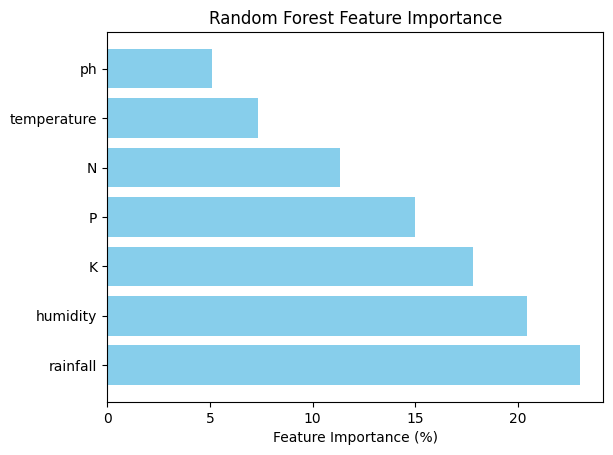

In [72]:
# Visualize Feature Importance
import matplotlib.pyplot as plt

features = feature_importances['Feature']
importances = feature_importances['Importance']*100
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.title('Random Forest Feature Importance')
plt.show()

## Interpret the p-values from your statistical tests to determine significance levels, and use this to draw conclusions about the factors that are most predictive of crop type.

To interpret the p-values from statistical tests (such as the ANOVA results), we'll be assessing which factors (e.g., **humidity**, **temperature**, **rainfall**, etc.) significantly influence crop type. Here’s a simple breakdown:

---

### **Step 1: Review p-values**
We have already performed ANOVA tests for each factor. Here are the results:

- **Humidity**: p-value = 0.0000e+00
- **Temperature**: p-value = 4.0193e-305
- **Rainfall**: p-value = 0.0000e+00
- **pH**: p-value = 6.4932e-199
- **Nitrogen (N)**: p-value = 0.0000e+00
- **Phosphorus (P)**: p-value = 0.0000e+00
- **Potassium (K)**: p-value = 0.0000e+00

---

### **Step 2: Interpret p-values**
- **Significance Threshold**: A common threshold for statistical significance is **0.05**. If the p-value is **less than 0.05**, the result is considered statistically significant. This suggests a strong relationship between the feature and crop type.

From your results, since all p-values are **much less than 0.05**, it indicates **statistical significance** for all the features.

---

### **Step 3: Draw Conclusions**
- **Key Predictive Factors**: Based on the p-values, all environmental factors (**humidity**, **temperature**, **rainfall**) and soil nutrients (**N**, **P**, **K**) are significantly related to crop type. This suggests these factors play a meaningful role in determining which crops grow best under certain conditions.
  
- **Most Predictive Factors**:
  - **Soil nutrients (N, P, K)**: With p-values near zero, the amount of nitrogen, phosphorus, and potassium in the soil strongly influences the choice of crop.
  - **Humidity & Rainfall**: These are also significant, suggesting that the crops in your dataset are sensitive to moisture levels in the environment.
  - **Temperature and pH**: Though significant, they appear to be slightly less impactful compared to the soil nutrients and moisture-related factors.

# Making a recommendation function

In [80]:
def predict_using_random_forest(input_values):
# Define new data with proper feature names
    new_data = pd.DataFrame([input_values], 
                            columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

    # Predict using the model
    predicted_label = model.predict(new_data)
    crop_type = le.inverse_transform(predicted_label)
    return crop_type

input_values = [90, 40, 50, 25, 80, 6.5, 210]
crop_type = predict_using_random_forest(input_values)
print("Recommended Crop:", crop_type[0])

Recommended Crop: rice


If a **Random Forest classifier** already delivers accurate results, why bother with statistical analysis? Here's why statistical analysis remains valuable, even alongside machine learning models:

---

### **1. Understand Feature Relationships**
- **Random Forest = Black Box**: While it provides predictions, it doesn't easily explain *why* certain features are important.
- **Statistical Analysis = Explainability**: Techniques like ANOVA help you understand how features like rainfall or pH affect crop selection. This can provide deeper insights into the relationships between factors and crops, which may not be directly visible in the model output.

---

### **2. Validating Model Results**
- **Statistical Significance**: Statistical analysis validates whether the observed relationships in the dataset are real or **could have occurred by chance.**
- For example:
  - If the p-value for "rainfall" is very small, you can be confident that rainfall significantly impacts crop type.
  - If the Random Forest ranks "pH" as less important but ANOVA shows it's statistically most significant, it might prompt further investigation.

---

### **3. Building Domain Knowledge**
- For tasks in agriculture or other scientific domains, the **goal is not just accuracy** but also understanding the problem space.
- Insights from statistical analysis can help agronomists or farmers:
  - Understand which factors to optimize for better yield.
  - Design experiments or strategies to improve farming practices.

---

### **4. Debugging and Model Improvement**
- **Cross-check Importance**: Statistical analysis can confirm or challenge the feature importance rankings given by Random Forest. 
- Example: If a feature has no statistical significance but is ranked highly by the model, it could indicate data leakage or an issue with the model.

---

### **5. Generalization Beyond the Dataset**
- **Statistical insights** can generalize beyond the dataset used. While a machine learning model is limited to patterns in its training data, statistical analysis explains fundamental relationships that are more universal.
- Example: Knowing "rainfall" significantly impacts crops can guide farmers in regions with different datasets or climates.

---

### **When to Skip Statistical Analysis?**
If your goal is purely **practical prediction**, and the Random Forest provides excellent results without overfitting, you can skip in-depth statistical analysis. However, for a **comprehensive understanding** and long-term value, combining statistical insights with machine learning is often the best approach.